Fitted Slope: 0.0000000000000040
Fitted Intercept: -1.987
Calculted plnck's constant: 6.370852174307613e-33
Calculted work function: 1.9867222801524018
--- FIT RESULTS ---
Intercept (phi): 1.987 +/- 0.084 Volts
Cesium has a work function of ~2.1, and our calculated work function: 1.987 +/- 0.084 is within the error range of 2.1


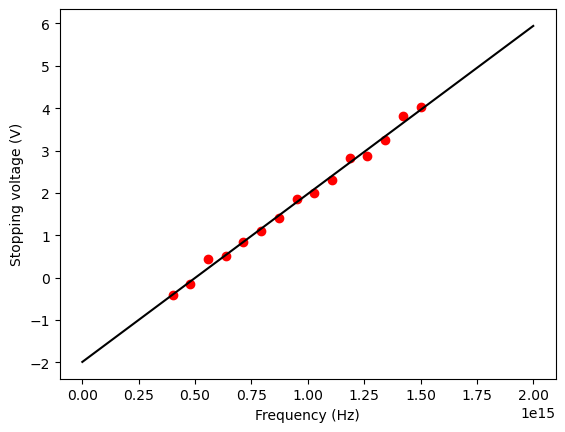

In [6]:
#Problem 1

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
def linear_model(f, m, c):
    return m*f+c

phot_el = np.loadtxt('photoelectric.csv', delimiter=',', skiprows=1)

freq = phot_el[:, 0]   # first column
volts = phot_el[:, 1]   # second column

plt.scatter(freq, volts, color='red', label='data')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Stopping voltage (V)')  

popt, pcov = curve_fit(linear_model, freq, volts)  

# Unpack the results
m_fit, c_fit = popt

#print(f"True Slope: {m_true}")
print(f"Fitted Slope: {m_fit:.16f}") # slope is small because x axis (Hz) is orders of magnitude greater than the y axis (v), and they are evenly matched
#print(f"True Intercept: {c_true}")
print(f"Fitted Intercept: {c_fit:.3f}")

# V = (h/e)f - phi,  So (h/e) = m, and c = -phi
e = 1.607*10e-19
h = e* m_fit
phi = -1*c_fit
print("Calculted plnck's constant:", h)
print("Calculted work function:", phi)



perr = np.sqrt(np.diag(pcov)) 
m_err, c_err =  perr         


print("--- FIT RESULTS ---")
print(f"Intercept (phi): {phi:.3f} +/- {c_err:.3f}", "Volts")
#print(f"R-squared: {r_squared:.4f}")
print(f"Cesium has a work function of ~2.1, and our calculated work function: {phi:.3f} +/- {c_err:.3f}", "is within the error range of 2.1")
x_data = np.linspace(0, 2e15, 20) # have to make the end point large
def bestfit(x):
    y = m_fit*x + c_fit
    return y

y_fit = bestfit(x_data)

plt.plot(x_data, y_fit, color='black', label='fit')









C:\Users\sonic\AppData\Local\Temp\ipykernel_12988\1877365204.py:13: RuntimeWarning: overflow encountered in power
  return (N0*np.e**(-1*lam*t)) + bg


788.9420124964231 0.0952255586444427 23.474589698401118
Fitted Initial value: 788.942
Fitted lambda: 0.095
Fitted background 23.475
The half life is 7.279003561932865


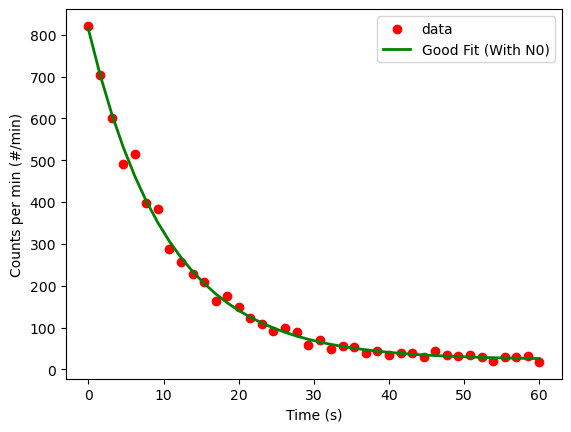

In [2]:
#Problem 2

decay_data = np.loadtxt('decay_data.csv', delimiter=',', skiprows=1)
time = decay_data[:, 0]   # first column
counts = decay_data[:, 1]   # second column

plt.scatter(time, counts, color='red', label='data')
plt.xlabel('Time (s)')
plt.ylabel('Counts per min (#/min)')  


def decay_model(t, N0, lam, bg):
    return (N0*np.e**(-1*lam*t)) + bg


popt_good, _ = curve_fit(decay_model, time, counts)
plt.plot(time, decay_model(time, *popt_good), label='Good Fit (With N0)', color='green', linewidth=2)

print(*popt_good) 
N0_fit, lam_fit, bg_fit = popt_good  # defines the fitted values from the curve fit, stored in the popt_good


#log parameters
print(f"Fitted Initial value: {N0_fit:.3f}") # slope is small because x axis (Hz) is orders of magnitude greater than the y axis (v), and they are evenly matched
print(f"Fitted lambda: {lam_fit:.3f}")
print(f"Fitted background {bg_fit:.3f}")

t_half = np.log(2) / lam_fit
print("The half life is", t_half)
plt.legend()
plt.show()


Fitted Slope: -0.0590571545486082
Fitted Intercept: 6.278
Questions:
(i) How do your parameters compare for the two fits? Which one is better? Why?
---There were 3 parameters for regular fit and two for the log fit, the parameters for regular fit led to a more alighned graph with the data
   while the log fit had a ok alignment, so I would say the regular fit had better parameters
(ii) Look at your log-plot. Does it look like a straight line for the whole time? Where does it fail,
and why? How could you make your fit better for this case?
---No it has many sharp edges, and it first fails at around a alue of 6 or 5, this could be due to the noise in the data.
   I would say adjust the fit accounting for the noise, like excluding data points that our extreme outliers, to see if the fit
   by itself is a good fit and the noise alone was making it a bad fit


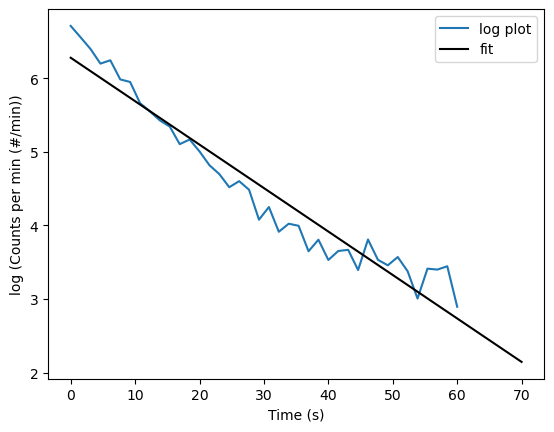

In [3]:
#Problem 2, part B
x_data2 = np.linspace(0, 70, 20)
log_counts = np.log(counts)


#log plot of exponential data above
plt.plot(time, log_counts, label = 'log plot')
popt, _ = curve_fit(linear_model, time, log_counts)  
m2_fit, c2_fit = popt

def bestfit2(x):
    y_2 = m2_fit*x + c2_fit
    return y_2

y_fit2 = bestfit2(x_data2)

plt.plot(x_data2, y_fit2, color='black', label='fit')

plt.xlabel('Time (s)')
plt.ylabel('log (Counts per min (#/min))')  

#linear fit parameters
print(f"Fitted Slope: {m2_fit:.16f}") # slope is small because x axis (Hz) is orders of magnitude greater than the y axis (v), and they are evenly matched
print(f"Fitted Intercept: {c2_fit:.3f}")


#Questions

print("Questions:")
print("(i) How do your parameters compare for the two fits? Which one is better? Why?")

print("---There were 3 parameters for regular fit and two for the log fit, the parameters for regular fit led to a more alighned graph with the data")
print("   while the log fit had a ok alignment, so I would say the regular fit had better parameters")

print("(ii) Look at your log-plot. Does it look like a straight line for the whole time? Where does it fail,")
print("and why? How could you make your fit better for this case?")
print("---No it has many sharp edges, and it first fails at around a alue of 6 or 5, this could be due to the noise in the data.")
print("   I would say adjust the fit accounting for the noise, like excluding data points that our extreme outliers, to see if the fit")
print("   by itself is a good fit and the noise alone was making it a bad fit")
plt.legend()
plt.show()


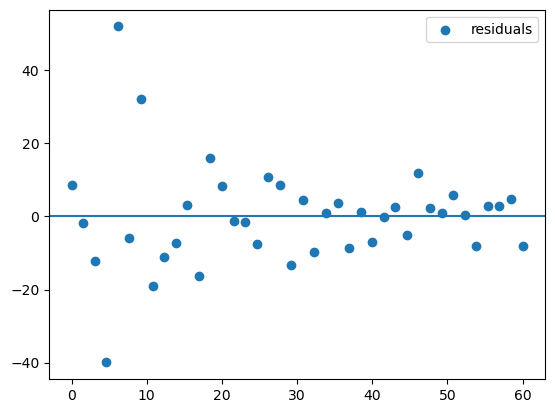

27
27


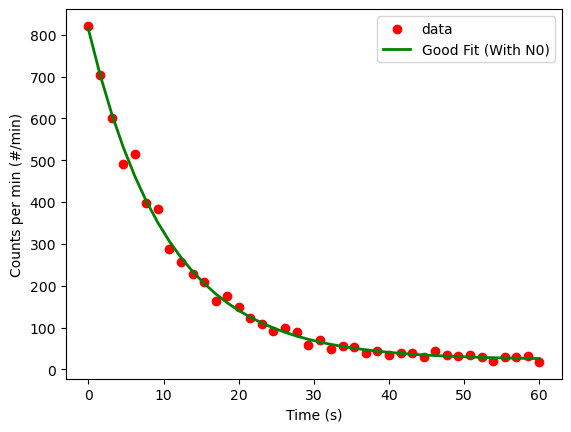

Do the residuals look like random noise (a cloud centered on zero), or do they have a
shape (like a wave or a U-shape)? What does this tell you about your model?
---The residuals kinda have a cone -ish shape. When residuals have a shape it usally means the model is a bad representation of the data


In [4]:
#Problem 3

#-----------------------
# 2. Calculate R-squared manually
# Residuals = Difference between Data and Fit
residuals = counts - decay_model(time, *popt_good)
plt.scatter(time, residuals, label = 'residuals')
plt.axhline(0)

plt.legend()
plt.show()
plt.subplots(1, 1, sharex=True)

#Data from problem 2

plt.scatter(time, counts, color='red', label='data')

plt.xlabel('Time (s)')
plt.ylabel('Counts per min (#/min)')  

#Best fit
plt.plot(time, decay_model(time, *popt_good), label='Good Fit (With N0)', color='green', linewidth=2)
print(3**3)
print(3*3*3)

plt.legend()
plt.show()

#Questions

print("Do the residuals look like random noise (a cloud centered on zero), or do they have a")
print("shape (like a wave or a U-shape)? What does this tell you about your model?")
print("---The residuals kinda have a cone -ish shape. When residuals have a shape it usally means the model is a bad representation of the data")

[1.85138884 0.71972655]
[-0.37979623  0.5148061   2.8243175  -0.01402008]
[ 0.00553567  0.01500082 -0.40592044  0.46003162  2.84805774  0.00927869]


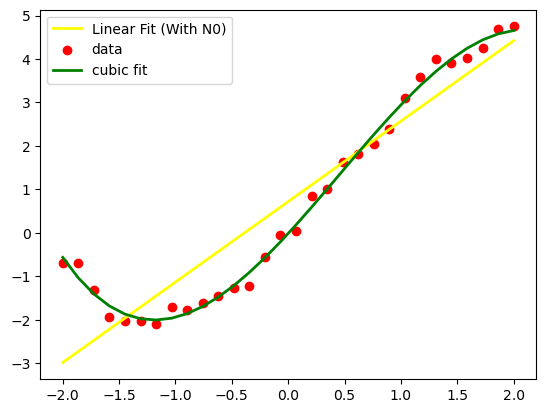

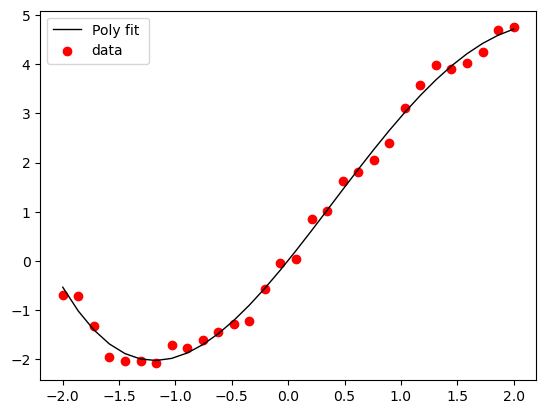

How many terms do you think you need to capture the data?
---To capture the data 3 polynomial terms worked really well, when I increased it to 5 polnomial terms there was no real difference in representation


In [5]:
#Problem 4
myst_data = np.loadtxt('mystery_data.csv', delimiter=',', skiprows=1)
#Define poly1(x, a, b) which returns (ax + b)
#Define poly3(x, a, b, c, d) which returns (ax3 + bx2 + cx + d.) 

def poly1(x,a,b):
    return a*x+b

def poly2(x,a,b,c,d):
    return a*(x**3)+b*(x**2)+c*x+d

def poly3(x,a,b,c,d,e,f):  #Just testing with more terms
    return a*(x**5)+b*(x**4)+c*(x**3)+d*(x**2)+e*x+f
    

x_my = myst_data[:, 0]   # first column
y_my = myst_data[:, 1]   # second column

popt_lin, _ = curve_fit(poly1, x_my, y_my) # have to make a curvefit for each model
popt_curve, _ = curve_fit(poly2, x_my, y_my)
popt_curve2, _ = curve_fit(poly3, x_my, y_my)

print(popt_lin)
print(popt_curve)
print(popt_curve2)   #number of values stored increases based on the number of polynomial values

plt.plot(x_my, poly1(x_my, *popt_lin), label='Linear Fit (With N0)', color='yellow', linewidth=2) # linear fit
plt.scatter(x_my, y_my, color='red', label='data') # data
plt.plot(x_my, poly2(x_my, *popt_curve), label='cubic fit', color='green', linewidth=2) # cubic fit

plt.legend()
plt.show()


plt.subplots(1, 1, sharex=True)

plt.plot(x_my, poly3(x_my, *popt_curve2), label='Poly fit ', color='black', linewidth=1) # curve fit 2
plt.scatter(x_my, y_my, color='red', label='data') # data
plt.legend()
plt.show()


#Questions

print("How many terms do you think you need to capture the data?")
print("---To capture the data 3 polynomial terms worked really well, when I increased it to 5 polnomial terms there was no real difference in representation")
